In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('Movie_regression.csv')

In [4]:
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400


In [5]:
df.shape

(506, 18)

# EDA

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           494 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

In [7]:
df.isnull().sum()

Marketing expense       0
Production expense      0
Multiplex coverage      0
Budget                  0
Movie_length            0
Lead_ Actor_Rating      0
Lead_Actress_rating     0
Director_rating         0
Producer_rating         0
Critic_rating           0
Trailer_views           0
3D_available            0
Time_taken             12
Twitter_hastags         0
Genre                   0
Avg_age_actors          0
Num_multiplex           0
Collection              0
dtype: int64

In [8]:
df['Time_taken'].mean()

157.39149797570855

In [9]:
df['Time_taken'].fillna(value=df['Time_taken'].mean(),inplace=True)

In [10]:
df.isnull().sum()

Marketing expense      0
Production expense     0
Multiplex coverage     0
Budget                 0
Movie_length           0
Lead_ Actor_Rating     0
Lead_Actress_rating    0
Director_rating        0
Producer_rating        0
Critic_rating          0
Trailer_views          0
3D_available           0
Time_taken             0
Twitter_hastags        0
Genre                  0
Avg_age_actors         0
Num_multiplex          0
Collection             0
dtype: int64

<AxesSubplot:xlabel='Budget', ylabel='Collection'>

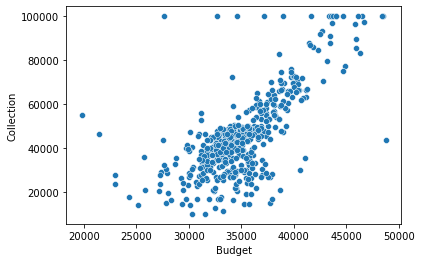

In [11]:
#scatterplot
sns.scatterplot(x=df.Budget,y=df.Collection)

<AxesSubplot:xlabel='Trailer_views', ylabel='Collection'>

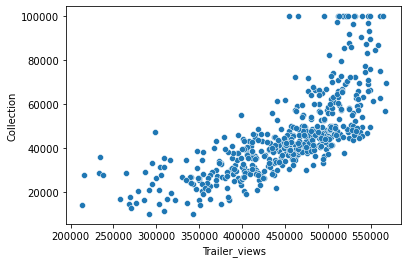

In [12]:
sns.scatterplot(x=df.Trailer_views,y=df.Collection)

## Dummy Variable Creation/One-hot Encoding 

In [13]:
df=pd.get_dummies(df,columns=['3D_available','Genre'],drop_first=True)
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,109.60,223.840,23,494,48000,1,0,0,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,146.64,243.456,42,462,43200,0,0,1,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,147.88,2022.400,38,458,69400,0,1,0,0
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,185.36,225.344,45,472,66800,1,0,1,0
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,176.48,225.792,55,395,72400,0,0,1,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  Time_taken           506 non-null    float64
 12  Twitter_hastags      506 non-null    float64
 13  Avg_age_actors       506 non-null    int64  
 14  Num_multiplex        506 non-null    int64  
 15  Collection           506 non-null    int

# Train Test Split

In [15]:
X=df.loc[:,df.columns!='Collection']
y=df['Collection']

In [16]:
type(y)
print(y)
print(y.shape)

0      48000
1      43200
2      69400
3      66800
4      72400
       ...  
501    44800
502    41200
503    47800
504    44000
505    38000
Name: Collection, Length: 506, dtype: int64
(506,)


In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
print('X_train Shape:', X_train.shape)
print('X_test Shape:', X_test.shape)
print('y_train Shape:', y_train.shape)
print('y_test Shape:', y_test.shape)



X_train Shape: (404, 19)
X_test Shape: (102, 19)
y_train Shape: (404,)
y_test Shape: (102,)


## Regression Tree 

In [20]:
from sklearn.tree import DecisionTreeRegressor

In [21]:
regtree=DecisionTreeRegressor()

In [22]:
regtree.fit(X_train,y_train)

DecisionTreeRegressor()

In [23]:
y_pred=regtree.predict(X_test)

In [24]:
y_pred

array([ 36800.,  57200.,  16200.,  49200.,  38600.,  46200.,  33200.,
        26200.,  48800.,  40600.,  41000.,  33200.,  24600.,  47800.,
        38600.,  74400.,  37600.,  24200.,  92000.,  25200.,  48200.,
        41000.,  27800.,  57400.,  17000.,  23400.,  43400.,  29800.,
        26400.,  46600.,  41000.,  33000.,  20800.,  45600.,  35400.,
        31200.,  74600.,  41200.,  45000.,  47400.,  45200.,  66800.,
        92000.,  38600.,  49200.,  25200.,  26400.,  47800.,  36600.,
        65000.,  39400.,  69800.,  35000.,  45600., 100000.,  39600.,
        31200.,  66000.,  45800.,  37800.,  46600.,  69200.,  53200.,
        36400.,  49000.,  28800.,  29800.,  44400.,  59600.,  38600.,
        42200.,  45600.,  16400.,  36400.,  44400.,  14400.,  39000.,
        96600.,  27800.,  16200.,  42200.,  20400.,  39200.,  23600.,
        38600.,  47600.,  28600.,  44400.,  48200.,  36000.,  42200.,
        21000.,  30400.,  35200.,  38200.,  39800., 100000.,  20400.,
        28200.,  204

## Model Performance 

In [25]:
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

In [26]:
r2_score(y_test,y_pred)

0.8237961916480666

In [27]:
mean_squared_error(y_test,y_pred)

51976078.431372546

In [28]:
mean_absolute_error(y_test,y_pred)

5578.431372549019

In [29]:
np.sqrt(mean_squared_error(y_test,y_pred))

7209.4436977739515

In [30]:
pd.options.display.float_format = '{:.3f}'.format

In [31]:
regtree.feature_importances_

array([3.34636190e-02, 1.19295670e-02, 3.74250642e-02, 5.96858996e-01,
       2.12713632e-02, 7.97642427e-04, 8.21930414e-02, 5.17997248e-03,
       4.88248540e-03, 5.20551845e-03, 1.60689049e-01, 1.01953468e-02,
       1.60217077e-02, 2.88604792e-03, 7.76141206e-03, 1.48678421e-03,
       1.64514377e-03, 5.74867593e-05, 4.97518299e-05])

In [32]:
pd.DataFrame(index=X.columns,data=regtree.feature_importances_,columns=['Feature Importance'])

,Feature Importance
Marketing expense,0.033
Production expense,0.012
Multiplex coverage,0.037
Budget,0.597
Movie_length,0.021
Lead_ Actor_Rating,0.001
Lead_Actress_rating,0.082
Director_rating,0.005
Producer_rating,0.005
Critic_rating,0.005


## Plotting Regression Tree

In [33]:
from sklearn.tree import plot_tree

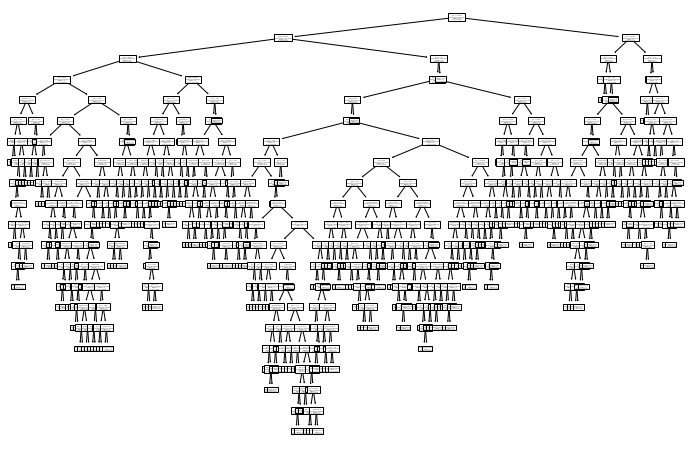

In [34]:
plt.figure(figsize=(12,8))
plot_tree(regtree);

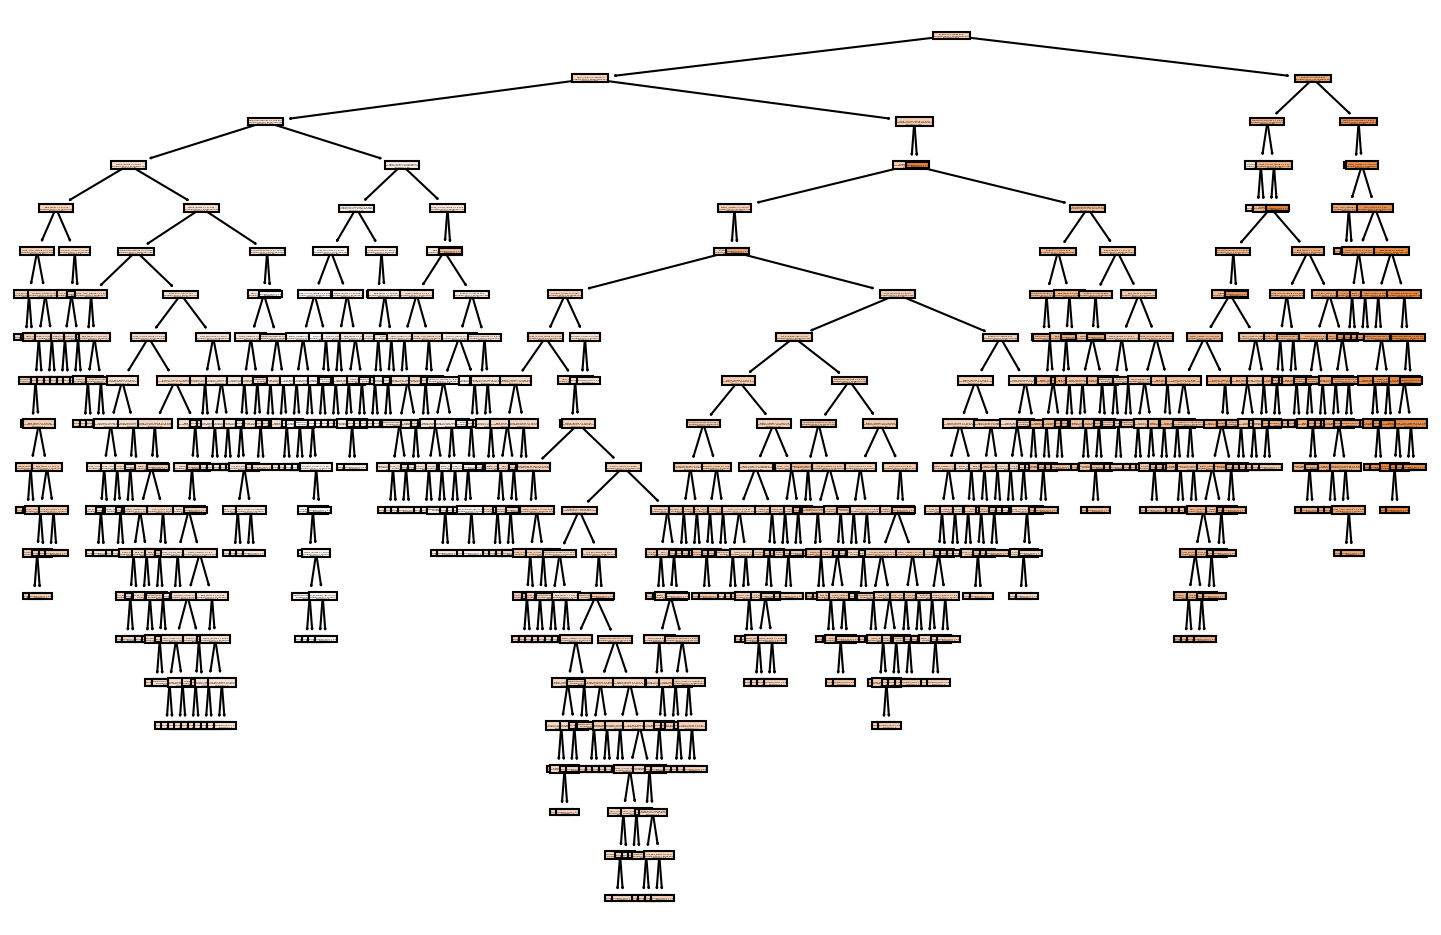

In [35]:
plt.figure(figsize=(12,8), dpi=150)
plot_tree(regtree,filled=True, feature_names=X.columns);

## Reporting Model Result 

In [36]:
def report_model(regtree):
    y_pred=regtree.predict(X_test)
    print(r2_score(y_test,y_pred))
    print(mean_absolute_error(y_test,y_pred))
    print(mean_squared_error(y_test,y_pred))
    print(np.sqrt(mean_squared_error(y_test,y_pred)))
    print("\n")
    plt.figure(figsize=(12,8),dpi=150)
    plot_tree(regtree,filled=True,feature_names=X.columns);
    
    

## Hyperparameter Tuning

In [37]:
regtree1=DecisionTreeRegressor(max_depth=3)

In [38]:
regtree1.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=3)

0.8196931100678884
5973.830091874478
53186393.30490645
7292.900198474297




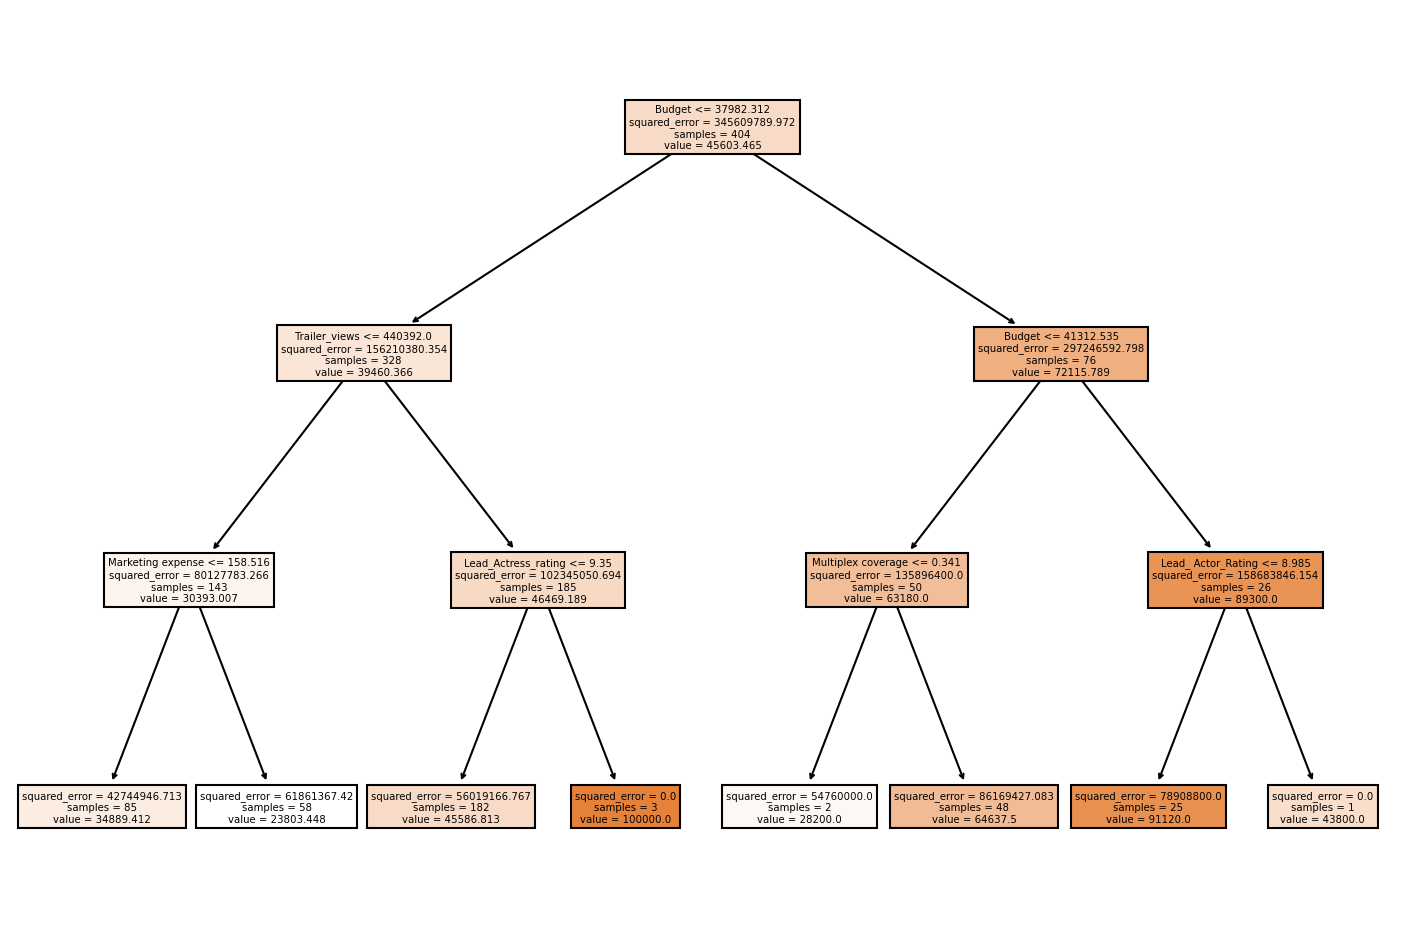

In [39]:
report_model(regtree1)

In [40]:
regtree2=DecisionTreeRegressor(max_leaf_nodes=3)
regtree2.fit(X_train,y_train)

DecisionTreeRegressor(max_leaf_nodes=3)

0.5386238265705989
8271.640199813573
136095379.55409333
11665.992437597983




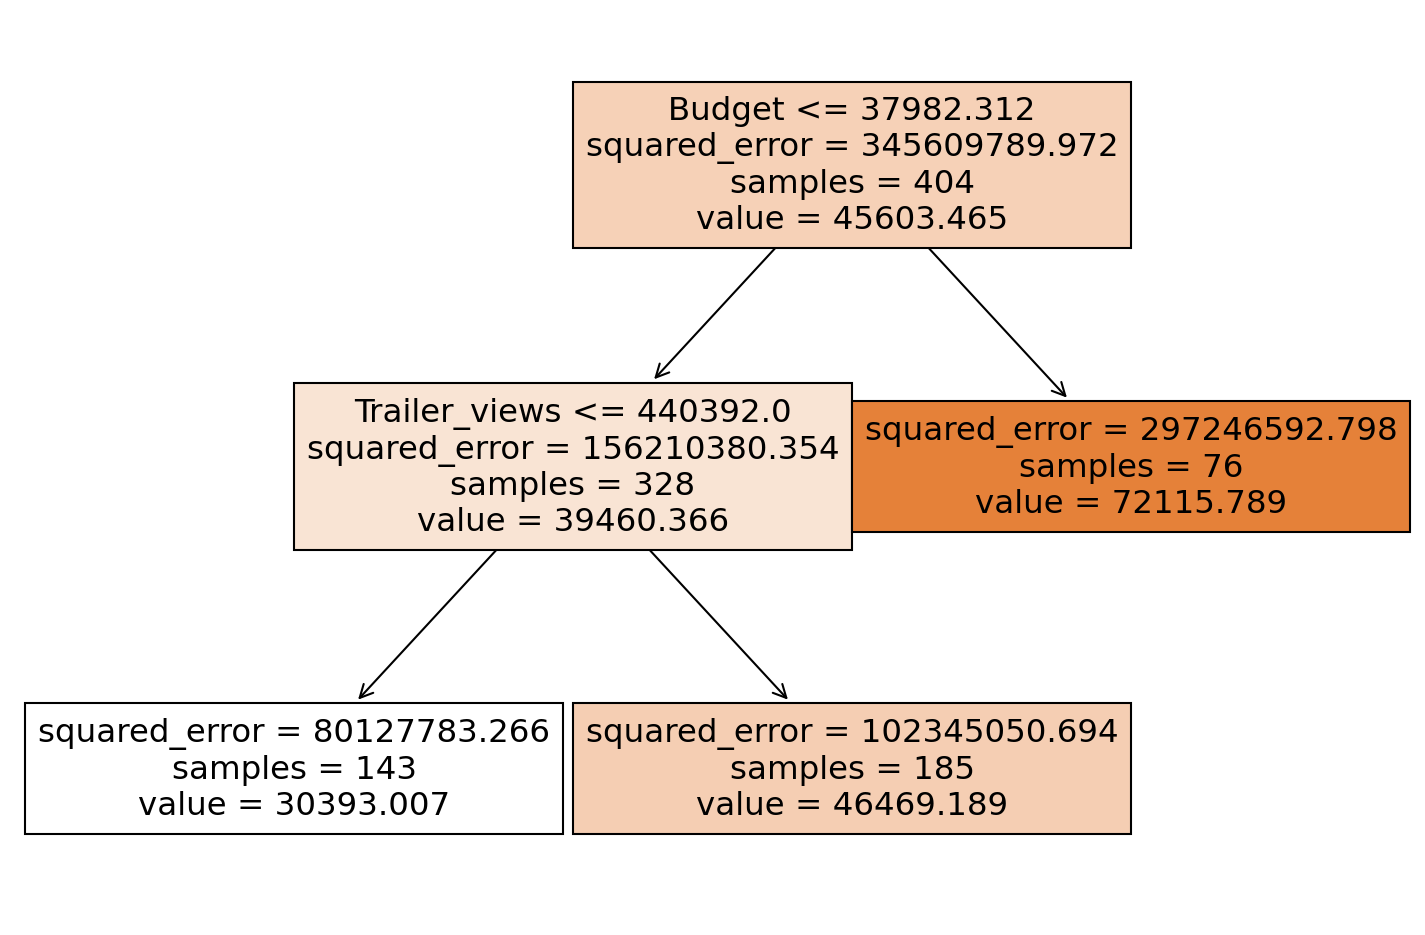

In [41]:
report_model(regtree2)

In [42]:
#fourth model
regtree3=DecisionTreeRegressor(max_depth=3,max_features=2,max_leaf_nodes=3)
regtree3.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, max_features=2, max_leaf_nodes=3)

0.20604447042069585
10963.323968717119
234198654.7419765
15303.550396622886




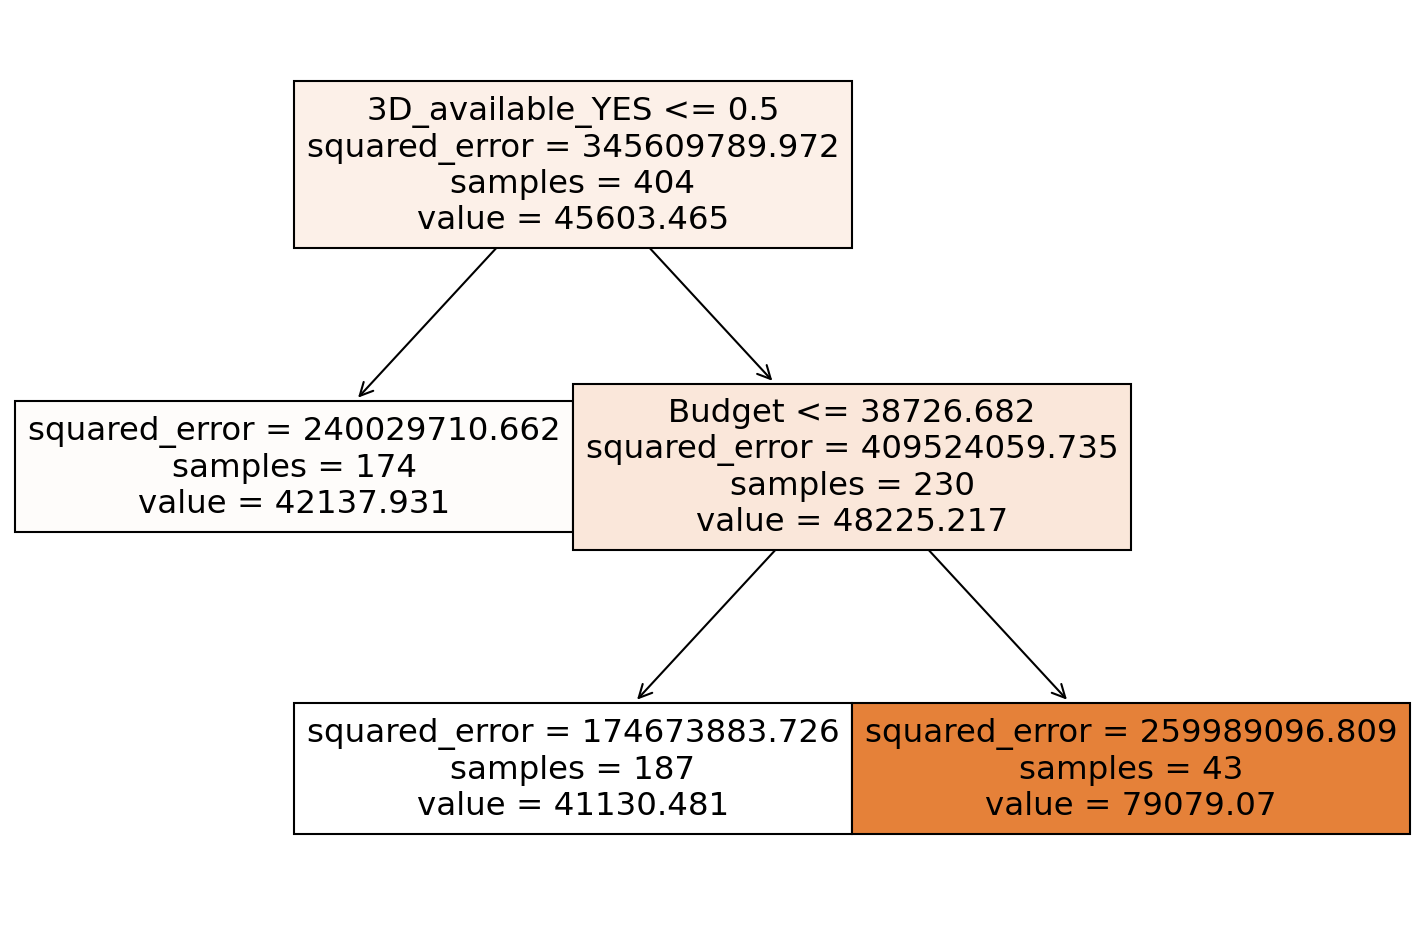

In [43]:
report_model(regtree3)

# Random Forest Regressor

In [44]:
from sklearn.ensemble import RandomForestRegressor

In [45]:
model_1=RandomForestRegressor()

In [46]:
model_1.fit(X_train, y_train)

RandomForestRegressor()

In [47]:
y_pred=model_1.predict(X_test)

## Evaluation performance

In [48]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [49]:
r2_score(y_test,y_pred)

0.8563620271794328

In [50]:
mean_absolute_error(y_test,y_pred)

4419.333333333333

In [51]:
mean_squared_error(y_test,y_pred)

42369904.549019605

In [52]:
model_1.feature_importances_

array([3.68865367e-02, 7.67526177e-03, 1.68627557e-02, 5.63913118e-01,
       1.66880076e-02, 1.32328521e-02, 3.79449183e-02, 2.17031821e-02,
       1.24252195e-02, 9.23397930e-03, 2.16480122e-01, 1.06781288e-02,
       1.80224933e-02, 6.67213898e-03, 8.63663670e-03, 8.43183252e-04,
       5.25180377e-04, 9.02597782e-04, 6.73687869e-04])

In [53]:
pd.DataFrame(index=X.columns,data=model_1.feature_importances_,columns=['Feature Importance'])

,Feature Importance
Marketing expense,0.037
Production expense,0.008
Multiplex coverage,0.017
Budget,0.564
Movie_length,0.017
Lead_ Actor_Rating,0.013
Lead_Actress_rating,0.038
Director_rating,0.022
Producer_rating,0.012
Critic_rating,0.009


In [54]:
model_2=RandomForestRegressor(max_depth=3,max_features=3)

In [55]:
model_2.fit(X_train, y_train)

RandomForestRegressor(max_depth=3, max_features=3)

In [56]:
y_pred=model_2.predict(X_test)

In [57]:
r2_score(y_test,y_pred)

0.6520945686784356

## GridsearchCV 

In [58]:
from sklearn.model_selection import GridSearchCV

In [59]:
n_estimators=[10,20,50,100]
max_features=[2,3,4,5]
bootstrap=[True,False]
oob_score=[True,False]


In [60]:
param_grid={'n_estimators':n_estimators,
           'max_features':max_features,
           'bootstrap':bootstrap,'oob_score':oob_score}

In [61]:
rfr=RandomForestRegressor()
grid=GridSearchCV(rfr,param_grid)

In [62]:
grid.fit(X_train,y_train)

C:\Users\91915\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\91915\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\91915\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\91915\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\91915\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probab

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False],
                         'max_features': [2, 3, 4, 5],
                         'n_estimators': [10, 20, 50, 100],
                         'oob_score': [True, False]})

In [63]:
grid.best_estimator_

RandomForestRegressor(bootstrap=False, max_features=5, n_estimators=50)

In [64]:
predictions=grid.predict(X_test)

In [65]:
r2_score(y_test,predictions)

0.8729862916811347

In [66]:
errors=[]
for n in range(1,51):
    rfr=RandomForestRegressor(n_estimators=n,max_features=5,bootstrap=False)
    rfr.fit(X_train,y_train)
    preds=rfr.predict(X_test)
    err=1-r2_score(y_test,preds)
    errors.append(err)

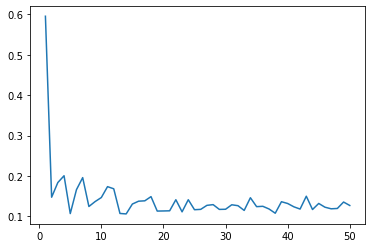

In [67]:
plt.plot(range(1,51),errors)

In [68]:
#best model according to gridsearchCV
rfr=RandomForestRegressor(n_estimators=49,bootstrap=False, max_features=5)
rfr.fit(X_train,y_train)
preds=rfr.predict(X_test)
r2_score(y_test,preds)

0.85453334140278

In [69]:
rfr.feature_importances_

array([0.06506859, 0.07567872, 0.06308437, 0.31090833, 0.02239779,
       0.04353685, 0.03370673, 0.03233578, 0.01931698, 0.02121659,
       0.21390933, 0.02420508, 0.02622364, 0.01022166, 0.02867416,
       0.003678  , 0.00184456, 0.00212456, 0.00186827])

In [70]:
pd.DataFrame(index=X.columns,data=rfr.feature_importances_,columns=['Feature Imporance'])


,Feature Imporance
Marketing expense,0.065
Production expense,0.076
Multiplex coverage,0.063
Budget,0.311
Movie_length,0.022
Lead_ Actor_Rating,0.044
Lead_Actress_rating,0.034
Director_rating,0.032
Producer_rating,0.019
Critic_rating,0.021
